<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Paula Alejandra Pabon Diaz

## Cambio de ideas del Presidente Duque


###  Hacer análisis de sentimiento de los datos del anterior taller


In [43]:
import re 
import pandas as pd
import gensim
import platform
from nltk.corpus import stopwords

C:\Users\paula\AppData\Roaming\Python\Python38\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [102]:

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords_sp = stopwords.words('spanish')

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [103]:
from textblob  import  TextBlob 
from vaderSentiment.vaderSentiment  import  SentimentIntensityAnalyzer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# pip install plotly
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

%matplotlib inline
init_notebook_mode(connected=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [104]:

import pandas as pd
import tweepy
import csv
import json
from pandas import json_normalize
import gensim.models.word2vec as w2v
import pyLDAvis.gensim_models
from gensim.models import LdaModel 
from gensim.corpora import Dictionary
from pprint import pprint 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [91]:
data = pd.read_excel("C:/Users/paula/OneDrive/Escritorio/KONRAD_LORENZ/SEMESTRE_II/NLP/mix.xlsx")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [92]:

stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto.split()

data = data
data['pp'] = data["item"].apply(lambda texto: pre_procesado(texto))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [93]:
    %%time

mi_modelo = w2v.Word2Vec(data['pp'].values,
                        sg=1, # 1 para usar skip-gram, 0 para usar CBOW
                        seed=1, # 1 para tener resultados reproducibles y debuggear
                        vector_size=256, # tamaño de los vectores 
                        min_count=50, # mínimo de veces que ha de aparecer una palabra para ser considerada
                        window=12, # ventana contextual de cada palabra
                        )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Wall time: 14.4 s


In [94]:
mi_modelo.wv.most_similar("paz")


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[('legalidad', 0.5361987948417664),
 ('digamos', 0.5143807530403137),
 ('republicana', 0.4971827268600464),
 ('basta', 0.47038424015045166),
 ('mitad', 0.4680061340332031),
 ('armados', 0.4675702750682831),
 ('justifique', 0.46662917733192444),
 ('pensar', 0.46507614850997925),
 ('impunidad', 0.4554057717323303),
 ('pocos', 0.4530877470970154)]

In [95]:
mi_modelo.wv.most_similar("justicia")


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[('proporcional', 0.5742831826210022),
 ('repetición', 0.5586816668510437),
 ('pretenda', 0.520332932472229),
 ('reparación', 0.5111438035964966),
 ('crímenes', 0.5040993690490723),
 ('victimario', 0.4736117124557495),
 ('decorativas', 0.4727916419506073),
 ('sanciones', 0.45437151193618774),
 ('víctima', 0.4521435499191284),
 ('daño', 0.45182523131370544)]

In [75]:
matrix = pd.DataFrame(mi_modelo.wv.get_normed_vectors(), index = mi_modelo.wv.key_to_index)
matrix

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
hoy,-0.087307,-0.096497,0.005594,0.168318,0.046427,0.020456,0.021950,0.113027,-0.041807,0.006672,...,0.064713,0.050480,-0.067641,-0.006388,0.031342,-0.055488,-0.055673,0.008966,-0.153540,-0.056265
país,0.012398,-0.095584,-0.014085,0.000320,0.009420,-0.002101,0.076560,0.071542,-0.111191,0.132806,...,-0.051628,-0.083817,-0.153627,-0.014188,0.050883,0.004673,-0.061894,-0.047439,-0.076699,0.002402
colombia,-0.044889,-0.089163,-0.083672,0.003768,0.036308,-0.055485,-0.032141,-0.025631,-0.057722,-0.003362,...,-0.006974,0.134607,0.031545,-0.066215,-0.016122,0.042994,0.022076,0.050770,-0.156942,0.126450
año,-0.011245,0.020738,-0.054360,-0.067715,0.148534,-0.003938,0.077729,0.002473,0.028587,-0.071303,...,0.031717,-0.062687,0.002738,0.033358,0.027075,-0.030344,-0.021399,0.034092,0.027297,-0.027072
quiero,-0.070228,0.051222,-0.072389,0.004612,0.114551,-0.102107,0.009027,0.033329,0.046934,0.095812,...,0.010315,0.089784,0.080976,-0.095408,0.002600,0.074226,-0.016014,-0.100950,-0.099080,0.058072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
podrán,-0.062353,-0.004205,-0.040753,0.080568,0.129500,0.036453,-0.030912,0.028863,-0.035480,0.079062,...,-0.065010,-0.035046,0.042621,-0.091685,-0.105332,0.012453,-0.041666,-0.022402,-0.143523,0.011998
policía,0.021024,0.049481,-0.047252,0.062881,0.043782,-0.001295,0.004254,-0.018429,-0.130094,0.098265,...,0.071081,0.047183,0.040294,0.076915,0.005156,0.067492,-0.100682,0.001100,-0.069997,0.027210
clase,-0.022439,0.048405,-0.033116,0.059364,0.066137,-0.055602,-0.013461,0.110509,-0.077555,0.039551,...,0.036855,0.016142,-0.086298,-0.026075,0.062792,0.177847,0.030539,0.010975,-0.082483,-0.021095
digital,-0.052005,0.008414,-0.035863,0.018060,-0.006659,-0.002157,-0.064370,0.103288,-0.085926,-0.004692,...,0.012246,0.031749,-0.032854,-0.078229,0.004995,0.113277,0.041259,-0.025152,-0.170602,-0.074690


In [77]:

pca = PCA(n_components=2)

result = pca.fit_transform(matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['Palabra'] = matrix.index.values


trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['Palabra'].values,
                   mode='markers',
                   name="vocabulario") 

layout = go.Layout(title="PCA")

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [84]:
# Crear una represantación de los documentos en forma de diccionario
dictionary = Dictionary(data['pp'].values)

# Filtrar palabras muy frecuentes o infrecuentes
dictionary.filter_extremes(no_below=5, no_above=0.5) 

# Corpus
corpus = [dictionary.doc2bow(text) for text in data['pp'].values]

# Entrenar el modelo
model = LdaModel(corpus = corpus, id2word = dictionary, num_topics = 5, passes=10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [80]:
model.print_topics(num_words=15)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[(0,
  '0.010*"turismo" + 0.010*"hoy" + 0.009*"colombia" + 0.008*"desarrollo" + 0.007*"banco" + 0.007*"ciudades" + 0.007*"año" + 0.006*"ciudad" + 0.006*"país" + 0.006*"pandemia" + 0.006*"países" + 0.006*"guajira" + 0.006*"sector" + 0.005*"agenda" + 0.005*"américa"'),
 (1,
  '0.014*"país" + 0.008*"colombia" + 0.007*"hoy" + 0.007*"año" + 0.006*"quiero" + 0.006*"millones" + 0.005*"jóvenes" + 0.005*"además" + 0.005*"empleo" + 0.004*"mensaje" + 0.004*"programa" + 0.004*"pandemia" + 0.004*"desarrollo" + 0.004*"programas" + 0.004*"derechos"'),
 (2,
  '0.010*"hoy" + 0.009*"ustedes" + 0.007*"si" + 0.007*"gobierno" + 0.007*"quiero" + 0.006*"año" + 0.006*"país" + 0.006*"aquí" + 0.005*"ser" + 0.005*"colombia" + 0.005*"hacer" + 0.004*"años" + 0.004*"educación" + 0.004*"guajira" + 0.004*"juventud"'),
 (3,
  '0.009*"siempre" + 0.007*"violencia" + 0.007*"día" + 0.006*"enrique" + 0.006*"hoy" + 0.005*"colombia" + 0.005*"país" + 0.005*"ser" + 0.005*"víctimas" + 0.004*"banco" + 0.004*"grandes" + 0.004*"ju

In [85]:
lda_display = pyLDAvis.gensim_models.prepare(model, corpus, dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [98]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

data['pp'] = data['item'].apply(lambda texto: pre_procesado(texto))


stopwords_sp = stopwords.words('spanish')

Counter(data['pp'].str.cat(sep=" ").split()).most_common(20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[('hoy', 4543),
 ('país', 4285),
 ('colombia', 3655),
 ('año', 3310),
 ('quiero', 2646),
 ('ser', 2533),
 ('desarrollo', 2188),
 ('siempre', 2083),
 ('ustedes', 2047),
 ('gobierno', 2008),
 ('pandemia', 1955),
 ('si', 1839),
 ('aquí', 1809),
 ('hacer', 1805),
 ('gran', 1677),
 ('banco', 1594),
 ('gracias', 1510),
 ('social', 1493),
 ('día', 1480),
 ('millones', 1480)]

In [ ]:

stopwords.extend(["muchas", "gracias"])

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

data['pp'] = data.discuros.apply(lambda texto: pre_procesado(texto))

data.head()

In [ ]:
palabras = data.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="spring",
                      stopwords=stopwords).generate(palabras)
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


# CARGAR IMAGEN 
img = PIL.Image.open("C:/Users/paula/OneDrive/Escritorio/KONRAD_LORENZ/SEMESTRE_II/NLP/mapa.jpg")
display(img)
  
mask = np.array(img)
mask

In [ ]:
***********modelo******************

In [107]:
final.tipo.value_counts(normalize=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



propuestas    0.52918
discursos     0.47082
Name: tipo, dtype: float64

In [108]:
train, test = train_test_split(final, test_size=0.2, random_state=42)
tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

X_train = tfidf_vect.fit_transform(train.item.values)
y_train = train.tipo.values

X_test = tfidf_vect.transform(test.item.values)
y_test = test.tipo.values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [109]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight = 'balanced')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [110]:
logreg.fit(X_train, y_train) 
y_pred_logreg =logreg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [111]:
print(f"Exactitud Regresión Logística: {accuracy_score(y_test, y_pred_logreg):>7.2f}")


Exactitud Regresión Logística:    1.00


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [115]:
metricas = [ precision_score, recall_score, f1_score]

for metrica in metricas:
    print(metrica.__name__)
    print(f" {metrica(y_test, y_pred_logreg, pos_label='propuestas'):.2f}")
    print()

precision_score
 1.00

recall_score
 1.00

f1_score
 1.00



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [116]:
#terminos mas usados en discuro

vocab = {value:key for key,value in tfidf_vect.vocabulary_.items()}
[(vocab[e[0]], round(e[1],2)) for e in zip(logreg.coef_[0].argsort(), sorted(logreg.coef_[0]))][:10]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[('hoy', -2.67),
 ('país', -2.66),
 ('colombia', -2.22),
 ('año', -1.97),
 ('quiero', -1.66),
 ('casos', -1.65),
 ('gobierno', -1.58),
 ('día', -1.49),
 ('quisiera', -1.46),
 ('siempre', -1.44)]

In [117]:
#terminos mas usados en propuestas

[(vocab[e[0]], round(e[1],2)) for e in zip(logreg.coef_[0].argsort(), sorted(logreg.coef_[0]))][-10:]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[('mediante', 0.24),
 ('integral', 0.26),
 ('jurídica', 0.26),
 ('campañas', 0.26),
 ('zonas', 0.27),
 ('fortaleceremos', 0.32),
 ('calidad', 0.32),
 ('transparencia', 0.34),
 ('exterior', 0.38),
 ('crearemos', 0.41)]

In [122]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42)

Tenemos 1525 datos en total.
El conjunto de datos de entrenamiento (train) tiene 1220 datos.
El conjunto de datos de prueba (test) tiene 305 datos.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [124]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf_vect.fit(train.item.values);

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [126]:
X_train = tfidf_vect.transform(train.item.values)
y_train = train.tipo.values

X_test = tfidf_vect.transform(test.item.values)
y_test = test.tipo.values


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [127]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [128]:
nb = MultinomialNB()
logreg = LogisticRegression(class_weight='balanced')
svm = LinearSVC(class_weight='balanced')
dt = DecisionTreeClassifier(class_weight='balanced')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [129]:
# Entrenamos los modelos
nb.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)
dt.fit(X_train, y_train);


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [130]:
y_pred_nb = nb.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_dt = dt.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [131]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [132]:
print(f"Naive Bayes: {accuracy_score(y_test, y_pred_nb):>15.2f}")
print(f"Regresión Logística: {accuracy_score(y_test, y_pred_logreg):>7.2f}")
print(f"SVM: {accuracy_score(y_test, y_pred_svm):>23.2f}")
print(f"Árbol de decisión: {accuracy_score(y_test, y_pred_dt):>9.2f}")

Naive Bayes:            0.99
Regresión Logística:    1.00
SVM:                    1.00
Árbol de decisión:      1.00


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [3]:

keys = pd.read_csv("C:/Users/paula/OneDrive/Escritorio/KONRAD_LORENZ/SEMESTRE_II/NLP/keys.csv", header=None)
keys = dict(zip(keys[0],keys[1]))
keys.keys()

dict_keys(['api_key', 'api_secret_key', 'access_token', 'access_token_secret', 'bearer_token'])

In [4]:
# Autenticar a través de la API 
auth = tweepy.OAuthHandler(keys['api_key'], keys['api_secret_key'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)

In [26]:

# Paso 4 Recolectar datos
tweets = tweepy.Cursor(api.search,
                       q=['ivan duque -RT'],
                       lang='es',
                       geocode='4.7110,-74.0721,100km',
                       tweet_mode='extended',
                       include_rts=False,
                       ).items(500)

In [27]:
# Objeto generador
t = [tweet for tweet in tweets]

t_processed = []

for tweet in t: 
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append('Bogotá')
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/stuatus/{tweet.id}")
    
    t_processed.append(temp)


In [28]:
    
data = pd.DataFrame(t_processed)
data.columns = ['tweets', 'date', 'city', 'user_location', 'id', 'link']


In [30]:
 vader = SentimentIntensityAnalyzer()


In [31]:
data['sentimiento_vader'] = data['tweets'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data['sentimiento_textblob'] = data['tweets'].apply(lambda valor: TextBlob(valor).sentiment.polarity)
data.head()


,tweets,date,city,user_location,id,link,sentimiento_vader,sentimiento_textblob
0,"""...Iván Duque...aseguró que se debió haber hecho más para...comunicación con los jóvenes...""\nQué ""proactividad"" ¿después de cuántos muertos y cuántos billones de pesos? \n@fdbedout @HFCardonaG @gusgomez1701 @YolandaRuizCe @MabelLaraNews @JMVivancoHRW @olgabehar1 @dianalzuleta https://t.co/l6OFpwikVI",2021-06-03 04:57:12,Bogotá,"Pereira, Risaralda, Colombia.",1400315609926209537,https://twitter.com/i/web/stuatus/1400315609926209537,0.0000,0.0
1,@NoticiasCaracol QUE TIENE QUE HACER UNA MEA CULPA LOQ TIENE QUE HACER ESTE TÍTERE IVÁN DUQUE MÁRQUEZ ES RENUNCIAR X SUS CRÍMENES COMETIDOS CONTRA JÓVENES ESTUDIANTES QUE PROTESTAN\n HOY YA NO ES EL PRESIDENTE DE COLOMBIA SINO OTRO REO Y EX PRESIDIARIO X SU ORDEN DE CAPTURA EMITIDA X CIDHH ONU,2021-06-03 04:52:43,Bogotá,colombia,1400314482744827908,https://twitter.com/i/web/stuatus/1400314482744827908,-0.4466,0.0
2,@Enterate_Bogota @SergioComunes EL TERRORISMO DE ESTADO COLOMBIANO CONTRA EL PUEBLO QUE PROTESTA HOY NO TIENE LIMITES \nQUE PASO CON LA CIDHH ONU OEA CPI Y LOS JUECES INTERNACIONALES QUE ANUNCIARON LA CAPTURA DE IVÁN DUQUE MÁRQUEZ Y URIBE VÉLEZ QUE HASTA EL DIA DE HOY NO SE HACE EFECTIVA O APOYAN LA DICTADURA,2021-06-03 04:49:48,Bogotá,colombia,1400313747672010760,https://twitter.com/i/web/stuatus/1400313747672010760,-0.7065,0.0
3,@charoguerra @PoliciaColombia @CIDH @ONUHumanRights EL PUEBLO COLOMBIANO SE ESTA DEFENDIENDO DE LOS ATAQUES TERRORISTAS DEL NARCO ESTADO COLOMBIANO LIDERADO POR URIBE VÉLEZ Y SU TÍTERE IVÁN DUQUE MÁRQUEZ Q SON LOS AUTORES INTELECTUALES DE LOS ASESINATOS CONTRA JÓVENES ESTUDIANTES Q PROTESTAN Y HOY Q ELLOS SE DEFIENDE LOS CONDENAN,2021-06-03 04:44:46,Bogotá,colombia,1400312480379834371,https://twitter.com/i/web/stuatus/1400312480379834371,0.0000,0.0
4,"En medio de las manifestaciones sociales, que ya cumplen más de 35 días, el presidente Iván Duque pidió disculpas y aseguró que se debió haber hecho más para fortalecer la comunicación con los jóvenes del país https://t.co/T3YF2bAq8s",2021-06-03 04:44:42,Bogotá,"Bogotá, Colombia",1400312464550600706,https://twitter.com/i/web/stuatus/1400312464550600706,0.0000,0.0


In [32]:
pd.set_option('display.max_colwidth', None)
resultado = data[['tweets', 'sentimiento_vader']].sort_values('sentimiento_vader')
resultado

,tweets,sentimiento_vader
331,"Voceador Colombia,SOLO OBEDECE AL CONVICTO URIBE""el mediocre Iván Duque va y se reúne en Medellín con el viejo violento de Uribe,y hay mismo manda echar plomo y violar derechos,que horror🤔😱🤬 https://t.co/L1pw1wRBtP",-0.8591
150,"Como será la desgracia de Iván Duque, que el retrograda y recalcitrante uribista Fernando Londoño, le pide la renuncia.\nManifiesta que el país no puede estar en manos de un ignorante, sin criterio, sin responsabilidad y carente de todo fundamento para manejar la presidencia.",-0.8555
439,"Ivan Duque No es un presidente, es una figura que representa la continuación del Uribismo en el país. Ivan Duque NO es independiente, obedece a las órdenes de Uribe quien no sacia su hambre de poder. Ivan Duque No es una cara nueva en la política, es la extensión de un 👇 https://t.co/0a2pFb1nJc",-0.8192
101,"@PalomaValenciaL Malditos comunistas, quitaron todo para hacer más presión!!! \nCómo? Que Iván Duque es del centro democrático y es de derecha?? \nQue Duque no cumplió los 100 días que prometió en la isla?\nQue la situación de Providencia no la ha arreglado ningún gbno? Baia baia\n\nBaia Baia Baia",-0.8059
165,"@linamarcela2 Nosotras somos una ONG. Sin duda se refiere usted a la @CIDH, cuya inminente visita a #Colombia🇨🇴, en efecto, representa una gran esperanza para la defensa de los Derechos Humanos. Deseamos que el gobierno de Iván Duque les permita desempeñar su labor sin restricciones.",-0.8020
...,...,...
411,"@WRadioColombia Esto es lo que yo llamo devolverle el favor se acuerdan de las horas contadas, el concierto por Venezuela etc... pues ahora este badulaque nos está devolviendo el favor gracias a el señor Ivan Duque que boleta que pena tan malparida que ese man esté diciendo eso",0.6597
474,En este perfil seguimos Firmes con Iván Duque Marquez Presidente de Colombia.\n\nUn magnífico ser Humano y un gran líder \n\n✋🙋,0.7506
211,"@IvanDuque en @BluRadioCo confirmó q'la Copa América sigue firme para disputarse en el país y explicó...el certamen sigue siendo viable en Colombia, pese a las problemáticas🤣🤣\n#DuqueMentiroso\n\n@IvanDuque firme con la decisión: ¿se jugará la Copa América? https://t.co/VkFnNWAkf1",0.7506
294,"Lo que estaban esperando los mamertos, el Presidente Iván Duque renunció. Ya está buscando empleo. 🤣🤣 Mañana más cuenta chistes. @DonJediondo @elmonosanchezof @risalocahumor @polillafeliz @diazsalamanca https://t.co/Cxaame5fRM",0.7506


### ¿Cuál es el tuit más positivo y más negativo?

In [33]:
# Tuit mas negativo
resultado.head(1)

,tweets,sentimiento_vader
331,"Voceador Colombia,SOLO OBEDECE AL CONVICTO URIBE""el mediocre Iván Duque va y se reúne en Medellín con el viejo violento de Uribe,y hay mismo manda echar plomo y violar derechos,que horror🤔😱🤬 https://t.co/L1pw1wRBtP",-0.8591


In [34]:
# Tuit mas positivo
resultado.tail(1)

,tweets,sentimiento_vader
73,@CathyJuvinao Muy Iván Duque a la máxima potencia ... y hasta más!!! Hasta él se sorprende 😂🤣😅😂🤣😅 https://t.co/ypAIfT0SYK,0.9522


###  `[10 pts]` Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?

In [35]:
negativos = resultado['sentimiento_vader'] < 0.000
neg = resultado[negativos]
neg.head()

,tweets,sentimiento_vader
331,"Voceador Colombia,SOLO OBEDECE AL CONVICTO URIBE""el mediocre Iván Duque va y se reúne en Medellín con el viejo violento de Uribe,y hay mismo manda echar plomo y violar derechos,que horror🤔😱🤬 https://t.co/L1pw1wRBtP",-0.8591
150,"Como será la desgracia de Iván Duque, que el retrograda y recalcitrante uribista Fernando Londoño, le pide la renuncia.\nManifiesta que el país no puede estar en manos de un ignorante, sin criterio, sin responsabilidad y carente de todo fundamento para manejar la presidencia.",-0.8555
439,"Ivan Duque No es un presidente, es una figura que representa la continuación del Uribismo en el país. Ivan Duque NO es independiente, obedece a las órdenes de Uribe quien no sacia su hambre de poder. Ivan Duque No es una cara nueva en la política, es la extensión de un 👇 https://t.co/0a2pFb1nJc",-0.8192
101,"@PalomaValenciaL Malditos comunistas, quitaron todo para hacer más presión!!! \nCómo? Que Iván Duque es del centro democrático y es de derecha?? \nQue Duque no cumplió los 100 días que prometió en la isla?\nQue la situación de Providencia no la ha arreglado ningún gbno? Baia baia\n\nBaia Baia Baia",-0.8059
165,"@linamarcela2 Nosotras somos una ONG. Sin duda se refiere usted a la @CIDH, cuya inminente visita a #Colombia🇨🇴, en efecto, representa una gran esperanza para la defensa de los Derechos Humanos. Deseamos que el gobierno de Iván Duque les permita desempeñar su labor sin restricciones.",-0.8020


In [36]:
neg.count()

tweets               138
sentimiento_vader    138
dtype: int64

In [37]:
#el numero de tuits negativos es 17

In [38]:
positivos = resultado['sentimiento_vader'] > 0.000
pos = resultado[positivos]
pos.head()

,tweets,sentimiento_vader
461,@AndreaGuerreroQ Iván duque ha estado entrenado con su guitarra y si lo siguen frustrando y no gana nada va a acabar con el país. Jaja,0.0516
97,"Presidente Iván Duque reconoció que ha habido abuso policial, pero asegura que no es sistemático - Infobae https://t.co/CHt2esZ05q",0.0516
25,"@IvanDuque #AlAire ""No queremos que la juventud deserte, en este segundo semestre empieza la educación pública gratis para estratos 1,2 y 3"": presidente Iván Duque (@IvanDuque) en #ForosBLU #BLU4P0",0.0516
206,Señaló que el presidente Iván Duque ya no tiene más excusas para iniciar una negociación. Los detalles acá ▶️ https://t.co/JE5YwT6oeG https://t.co/6UJmq6UJKv,0.0516
216,"Dentro del Gobierno creen que las críticas que le hace el @CeDemocratico son una estrategia para 2022.\n\nAsí mismo, @IvanDuque ha dicho públicamente que no se siente solo ni ""abandonado"" por su partido.\n\nAsí lo dijo ayer a @el_pais.\n\nhttps://t.co/zbjbPwdbcs",0.0516


In [39]:
pos.count()

tweets               46
sentimiento_vader    46
dtype: int64

In [ ]:
#el numero de tuits positivos es 75

###  `[5 pts]` : Punto 4: Una visualización sobre sus datos

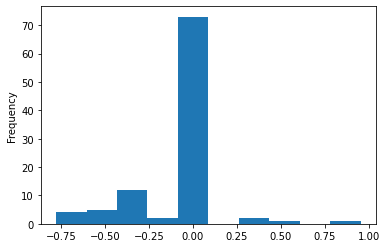

In [24]:
data['sentimiento_vader'].plot(kind='hist');

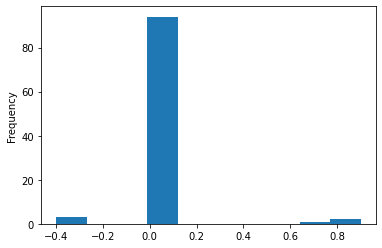

In [67]:

data['sentimiento_textblob'].plot(kind='hist');